In [99]:
# imports
import pandas as pd
import random
import time
from functions import vanilla_score
from functions import kippendorff_analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Define a placeholder function for vanilla_score
def random_score(text):
    return random.randint(1, 5)  # Placeholder to return a random score

In [66]:
# read in text data --> text_data
text_data = pd.read_csv('Data/texts.csv').drop(columns='Q')
text_data['T'] = text_data['T'].str.replace('T', '').astype(int)

In [106]:
# Get scores and descriptive statistics --> vanilla_GPT35_0 and vanilla_GPT35_0_scores
# Settings
model = 'gpt-4-0613'
temperature = 1.0
evaluations = 15
texts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# create variables
evaluator = 'test_gpt4o_1' # will contain score counts and descriptive statistics
scores = evaluator + '_scores' # contains raw scores in wide format
summary = evaluator + '_summary' ##TODO: to be removed 
direction = 'Data_LLM/' + scores + '.csv' 


globals()[scores] = text_data[['T', 'Text']]
globals()[scores] = globals()[scores].loc[globals()[scores]['T'].isin(texts)] # subset to only run for texts

# collect and transform scores --> vanilla_GPT35_0_scores
for i in range(1, evaluations+1): # create {evaluations} columns with scores
    globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(random_score(x)))
    # globals()[scores]['score ' + str(i)] = globals()[scores]['Text'].apply(lambda x: pd.Series(vanilla_score(x, model=model, temperature=temperature, reason=False)))

globals()[scores] = globals()[scores].drop(columns=['Text'])
globals()[scores] = globals()[scores].set_index('T').rename_axis(scores, axis='columns')
globals()[scores]
globals()[scores].to_csv(direction)

# cols = globals()[scores]['T'] # save text numbers as column names for later
# globals()[scores] = globals()[scores].transpose() # transpose scores
# globals()[scores].columns = cols # rename columns
# globals()[scores] = globals()[scores][1:].apply(pd.to_numeric) # convert to numeric
# globals()[scores]

# # get descriptive statistics and add to vanilla_GPT35_0 --> vanilla_GPT35_0
# globals()[evaluator] = globals()[scores].describe().transpose()[['mean', 'std', 'count']].round(2) # descriptive statistics
# globals()[evaluator]['score'] = globals()[evaluator]['mean'].round(0) # final score is the mean rounded to the nearest integer
# globals()[evaluator]
# globals()[scores]

# # transform scores to agreement table ##TODO 
# globals()[scores] = globals()[scores].melt(value_name='score').groupby(['T', 'score']).size().unstack(fill_value=0)
# globals()[scores] = globals()[scores].reindex(columns=[1,2,3,4,5], fill_value=0)# reorder columns
# globals()[scores]
# globals()[evaluator]

# globals()[scores] = globals()[scores].merge(globals()[evaluator], left_index=True, right_index=True)
# globals()[scores].to_csv(direction)
# globals()[scores]

In [58]:
# Analysis
kippendorff_analysis(value_counts=globals()[scores].select_dtypes(include=['int']))

Krippendorff's alpha: 0.830
95% CI: 0.785 - 0.829
Confidence of data being reliable and alpha being at least 0.8: 74.3%
Confidence of data being tentatively reliable and alpha being at least 0.667: 100.0%
Confidence of data being unreliable and alpha being less than 0.667: 0.0%



In [59]:
globals()[scores]

,1,2,3,4,5,mean,std,count,score
T,,,,,,,,,
1,0,0,8,2,0,3.2,0.42,10.0,3.0
2,0,1,9,0,0,2.9,0.32,10.0,3.0
3,0,0,6,4,0,3.4,0.52,10.0,3.0
4,0,0,8,2,0,3.2,0.42,10.0,3.0
5,0,1,8,1,0,3.0,0.47,10.0,3.0
6,10,0,0,0,0,1.0,0.00,10.0,1.0
7,1,8,1,0,0,2.0,0.47,10.0,2.0
8,1,9,0,0,0,1.9,0.32,10.0,2.0
9,1,7,2,0,0,2.1,0.57,10.0,2.0


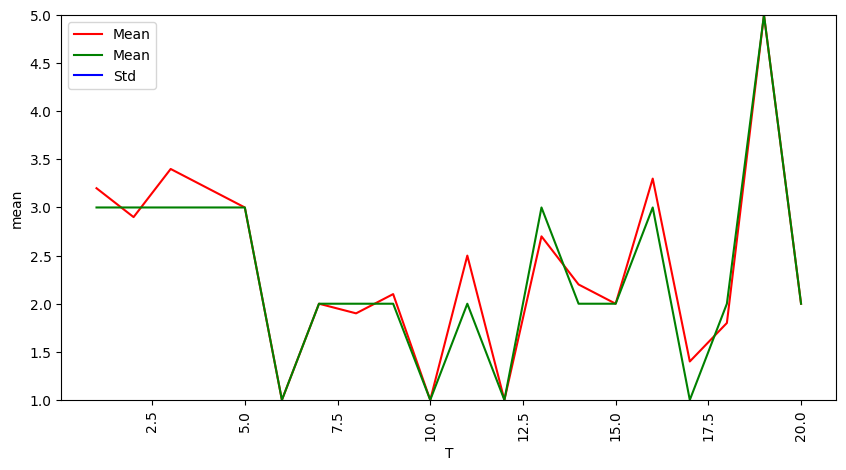

In [64]:
# Visualize
data = globals()[scores]
plt.figure(figsize=(10, 5))
sns.lineplot(x='T', y='mean', data=globals()[scores].sort_values('mean',ascending=False), color='red', label='Mean')
sns.lineplot(x='T', y='score', data=globals()[scores], color='green', label='Mean')
sns.lineplot(x='T', y='std', data=globals()[scores], color='blue', label='Std')
# sns.boxplot(x='T', y='score', data=data, fill=False)
plt.xticks(rotation=90)
plt.ylim(1, 5)
plt.show()